Ejercicio 1: Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$ usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos. Nota: El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de Euler que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

_Sabemos que  $m=k=b=1$ y $x_0=1, x'_0=0$_

_Sustituyendo tenemos:  $ \ddot x = -x -\dot x $, esta ecuación es equivalente a:  $\dot x=u \rightarrow \dot u=\ddot x$ entonces tenemos el siguiente sistema:_
$$\binom{\mathcal{\dot{x}}}{\dot{u}} = \binom{\mathcal{u}}{-x-u} $$

$$\rightarrow \frac{d\bar{x}}{dt}=  F(x,t) = \binom{\mathcal{u}}{-x-u} = (x[2],- x[1]-x[2])$$

In [2]:
function euler(f,list,x0) #usando la forma de euler dada por el profesor para varias diferenciales
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [3]:
## Definimos ahora el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión.

function RK4(f,listt,x0)
    
    h=listt[2]-listt[1]
    x=x0
    listx=[]
    push!(listx,x)

    for i in 1:length(listt)-1     ## Aplicamos la relación de recurrencia para el método de 4 orden con 4 iteraciones (como en la tarea pasada)
        it1=f(x,listt[i])
        it2=f(x+(h/2)*it1,listt[i]+h/2)
        it3=f(x+(h/2)*it2,listt[i]+h/2)
        it4=f(x+h*it3,listt[i+1])
        
        x=x+(h/6)*(it1+2*it2+2*it3+it4)
        push!(listx,x)     ## Guardamos cada valor obtenido en la lista "listx"
    end
   
   return listx
end

RK4 (generic function with 1 method)

In [4]:
F(x,t)=[x[2],-x[1]-x[2]] #función con las dos ecuaciones diferenciales 
x0=[1,0]  #condiciones iniciales de 0 y 1 del problema
ti=0   # intervalos de tiempo
tf=200;
## Definamos también la lista de espacio temporal sobre la cual las funciones actuarán
timelist=0:0.1:100

In [5]:
## Definimos nuestras funciones soluciones en términos de los métodos de Euler y Runge-Kutta de orden 4

Sol_Euler_x= map(x->x[1],euler(F,timelist,x0))
Sol_Euler_p= map(x->x[2],euler(F,timelist,x0))

Sol_RK_4x=map(x->x[1],RK4(F,timelist,x0))
Sol_RK_4p=map(x->x[2],RK4(F,timelist,x0))

1001-element Array{Any,1}:
  0          
 -0.0950042  
 -0.180064   
 -0.255318   
 -0.320982   
 -0.377346   
 -0.424758   
 -0.463619   
 -0.494374   
 -0.517502   
 -0.533508   
 -0.542918   
 -0.54627    
  ⋮          
  2.84081e-22
  2.90719e-22
  2.93961e-22
  2.941e-22  
  2.91429e-22
  2.86241e-22
  2.78825e-22
  2.69464e-22
  2.58432e-22
  2.45992e-22
  2.32397e-22
  2.17886e-22

In [6]:
using PyPlot

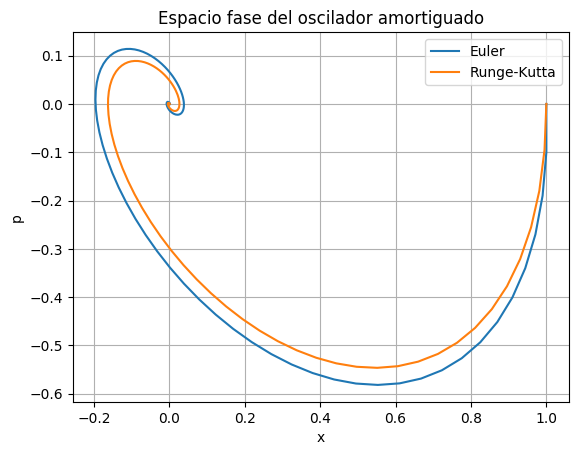

In [8]:
plot(Sol_Euler_x,Sol_Euler_p,label="Euler")
plot(Sol_RK_4x,Sol_RK_4p,label="Runge-Kutta")

title("Espacio fase del oscilador amortiguado")
grid("on")
legend()
xlabel("x")
ylabel("p")
show();

Ejercicio 2: Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [10]:
h(x,t)=[x[2], -sin(x[1])] #Definimos la función con l=1 y g=1.


h (generic function with 1 method)

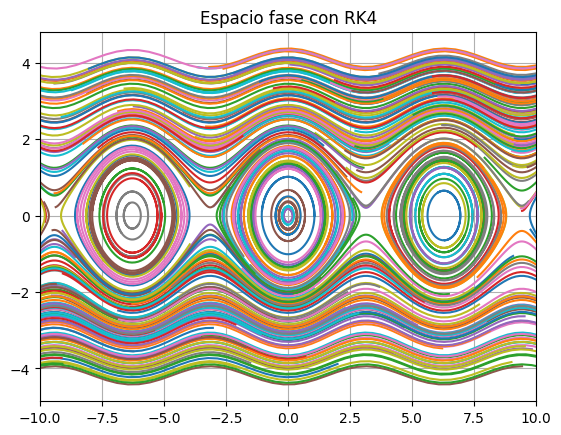

(-10,10)

In [12]:
title("Espacio fase con RK4") #Espacio fase para varias condiciones iniciales con Runge-Kutta.
grid("on")
list=0:0.1:10 #Se usa el intervalo [0,15] con h = 0.1.

for i in 1:400 #Entre más condiciones iniciales hagamos más aparecerá el espacio fase teórico.
    a=18*(2*rand(1)-1) #Tomamos valores aleatorios entre el [-3,3].
    b=4*(2*rand(1)-1)
    
    vec=RK4(h,list,[a,b]) #Se aplica Runge-Kutta y se guarda en dos lists.
    listx1rk=map(x->x[1],vec)
    listx2rk=map(x->x[2],vec)
    plot(listx1rk,listx2rk)
end
xlim(-10,10)

Ejercicio 3: Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [16]:
f(x,t)=x^2-1 #Definimos la funcion dx/dt.


f (generic function with 1 method)

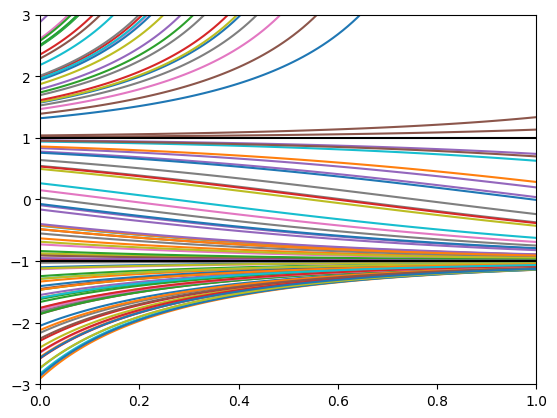

(-3,3)

In [18]:
listt=0:0.01:1
for i in 1:100
    a=3*(2*rand()-1)
    b=RK4(f,listt,a)
    plot(listt,b)
end
plot([0,1],[1,1],color="k") #Aqui pintamos la recta el 1 y -1, que son los puntos a donde se alejan y acercan las lineas.
plot([0,1],[-1,-1],color="k")
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

Podemos ver en la gráfica como los puntos -1 y 1 son atractor y repulsor

_Ejercicio 4:_ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$ cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [19]:
m(x,t)=x^2 #Definimos la funcion dx/dt.


m (generic function with 1 method)

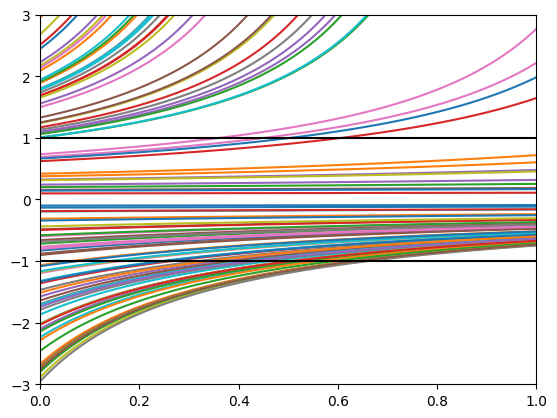

(-3,3)

In [20]:
listt=0:0.01:1
for i in 1:100
    a=3*(2*rand()-1)
    b=RK4(m,listt,a)
    plot(listt,b)
end
plot([0,1],[1,1],color="k") #Aqui pintamos la recta el 1 y -1, que son los puntos a donde se alejan y acercan las lineas.
plot([0,1],[-1,-1],color="k")
axes()[:set_xlim]([0,1])
axes()[:set_ylim]([-3,3])

Sólo hay un punto fijo, el cero y no es ni atractor ni repulsor.

Ejercicio 5: Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a ; b \\ c ; d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:

$a=c=1$, $b=d=0$

$a=c=-1$, $b=d=0$

$a=1$, $d=-2$, $c=b=0$

$a=1$, $d=-0.5$, $c=b=0$

$a=d=0$, $b=-c=1$

$a=d=1$, $b=-c=1$

$a=d=-1$, $b=-c=1$

$a=d=-1$, $b=-c=-1$

$a=d=1$, $b=4,c=-2$

$a=b=d=-1$, $c=0$

In [21]:
A(a,b,c,d,x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]] #Definimos el arreglo de la matriz a resolver y un intervalo de tiempo.
listt=0:0.1:10

0.0:0.1:10.0

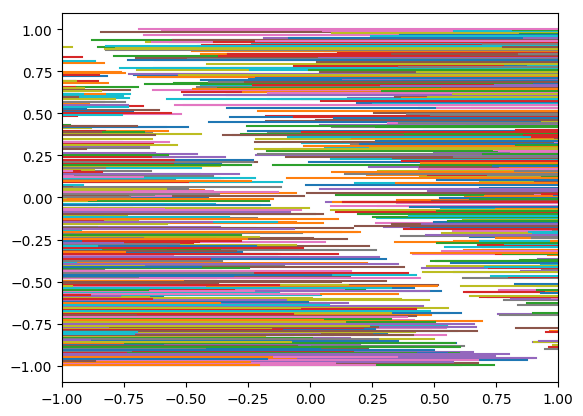

(-1,1)

In [23]:
A1(x,t)=A(1,1,0,0,x,t) #Aplicamos las condiciones iniciales de cada inciso.
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A1,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A1,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

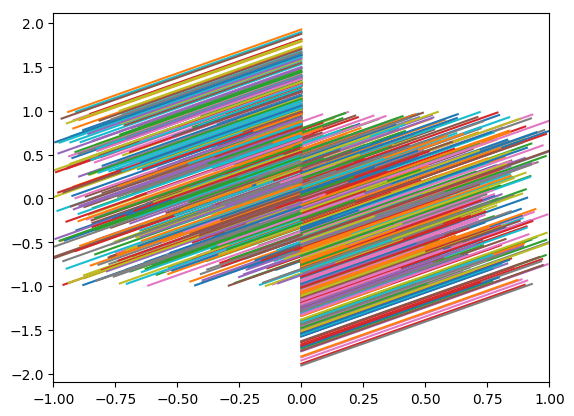

(-1,1)

In [47]:
A2(x,t)=A(-1,1,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A2,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A2,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)


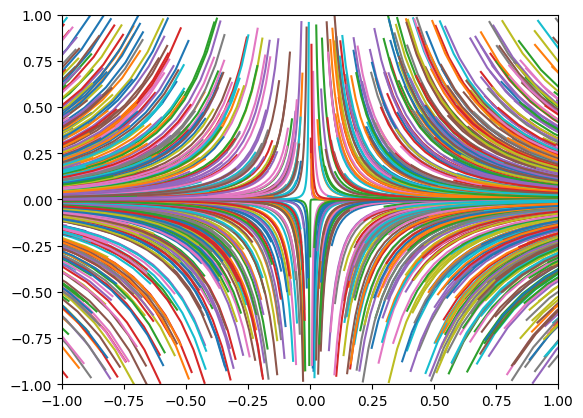

(-1,1)

In [45]:
A3(x,t)=A(1,-2,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A3,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A3,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

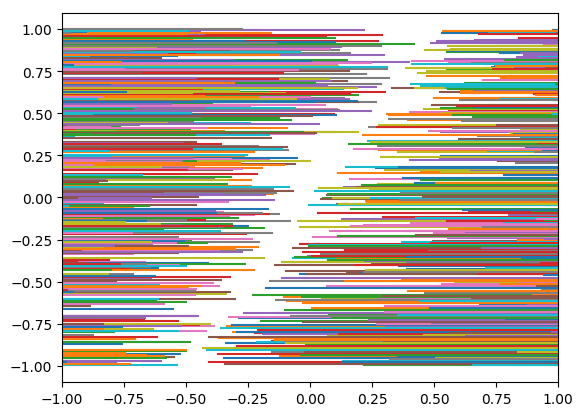

(-1,1)

In [38]:
A4(x,t)=A(1,-0.5,0,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A4,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A4,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

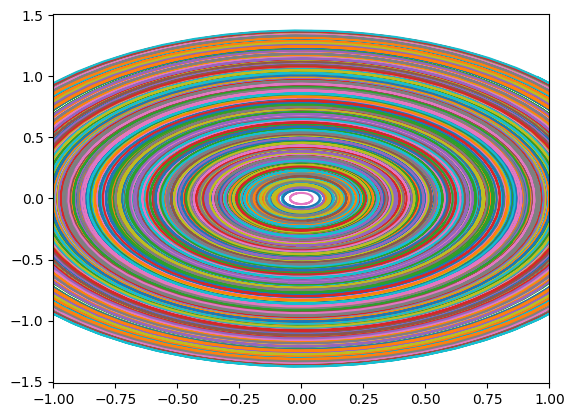

(-1,1)

In [39]:
A5(x,t)=A(0,1,-1,0,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A5,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A5,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

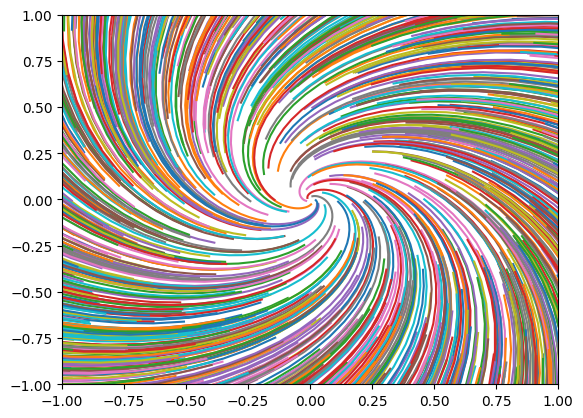

(-1,1)

In [44]:
A6(x,t)=A(1,1,-1,1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A6,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A6,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

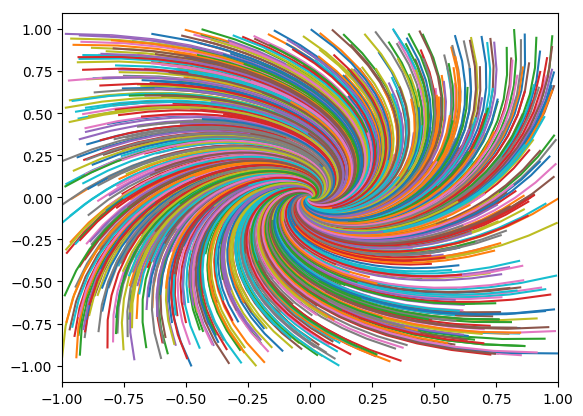

(-1,1)

In [48]:
A7(x,t)=A(-1,1,-1,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A7,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A7,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

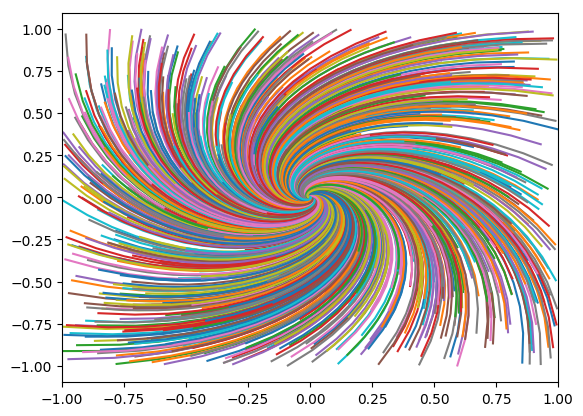

(-1,1)

In [49]:
A8(x,t)=A(-1,-1,1,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A8,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A8,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)

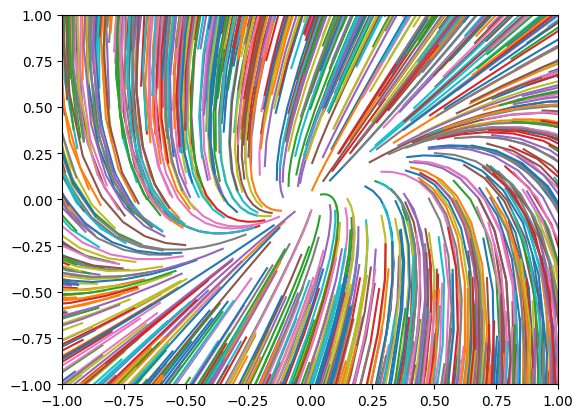

(-1,1)

In [50]:
A9(x,t)=A(1,1,-2,4,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A9,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A9,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)
axes()[:set_xlim]([-1,1])
axes()[:set_ylim]([-1,1])

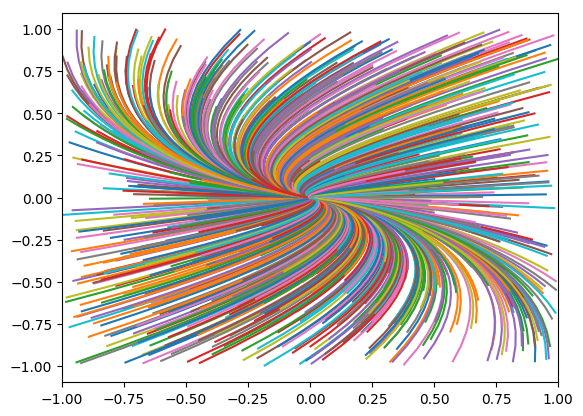

(-1,1)

In [51]:
A10(x,t)=A(-1,-1,0,-1,x,t)
for i in 1:1000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],RK4(A10,listt,[x0,y0]))
    listy=map(x->x[2],RK4(A10,listt,[x0,y0]))
    
    plot(listx,listy)
end
xlim(-1,1)